<h1 align="center"> Homework 8 Programming Task</h1>
<h3 align="center"> IST 5520: Data Methodologies in Python, 2018 Spring </h3>
<h3 align="center"> Student: XXX </h3>

**Instruction:**

Complete the following tasks (2 points for each task and question, 20 points in total). You can add additional lines if necessary.

In [1]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

# Task: Principal Component Analysis of Iris Dataset

(1) Prepare Iris Dataset

Load the iris dataset from sklearn.datasets package. Print out its description. Convert it into a pandas DataFrame.


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Class']= iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(2) Convert the value of Class variable

Use the following strings to represent class value:

- 0: 'Iris-Setosa'
- 1: 'Iris-Versicolour'
- 2: 'Iris-Virginica'

In [4]:
iris_df.Class = iris_df.Class.map({0:'Iris-Setosa', 1:'Iris-Versicolour', 2:'Iris-Virginica'})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa


(3) Normalize dataset

Standardize all columns except Class.

In [5]:
data_norm = scale(iris_df.loc[:,'sepal length (cm)':'petal width (cm)'])

(4) Principal component analysis with full components

In [6]:
# Select the number of components
pca1 = PCA(n_components=4)

# Fit the PCA model
pca1.fit(data_norm)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_

#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 72.77  95.8   99.48 100.  ]


(5) Draw a scree plot to show the cumulative variance explained along the number of principal components.

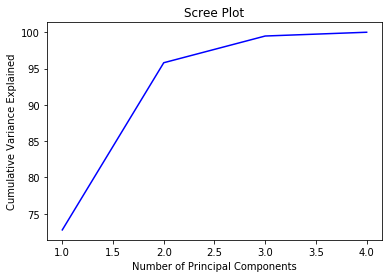

In [8]:
var1 = pd.DataFrame(var1, index=np.arange(1,5))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

**Question 1**: What is the least number of components we need to keep in order to keep 95% variance of the original predictors?

Your answer:

2


(6) Principal component analysis with two componenets.

In [9]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm)
data_pca2 = pca2.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


(7) Run a correlation analysis on the dimension-reducted dataset.

In [10]:
import scipy as sp
sp.stats.pearsonr(data_pca2['PC1'],data_pca2['PC2'])

(2.0249185278149436e-16, 1.0)

**Question 2**: What conclusion do you get from the correlation analysis?

Your answer:

Although the original predictors are correlated, principal components are orthogonal (not correlated, pearson correlation = 0.000, p-value = 1.0). This is because the principal component analysis applies an orthogonal rotation.

(8) Plot iris class onto the reduced two-dimensional space.

With the two-component solution, draw a scatter plot to show the reduced dataset. Actually, one popular use of PCA is to reduce dimension to two, thus allowing plot a multi-dimensional data on a 2D space.

The scatter plot should use "Principal Component 1" as x axis, "Principal Component 2" as y axis. Use different colors to represent points for different classes of Iris flower.

A sample scatter plot can be found here:
https://mst.instructure.com/files/407078/download?download_frd=1

You can refer to "Data Summarization and Visualization" jupyter notebook section 4.6 for scatter plot.

In [11]:
pca2_df = pd.concat([data_pca2,iris_df.Class],axis=1)

pca2_df.head()

,PC1,PC2,Class
0,-2.264542,0.505704,Iris-Setosa
1,-2.086426,-0.655405,Iris-Setosa
2,-2.367950,-0.318477,Iris-Setosa
3,-2.304197,-0.575368,Iris-Setosa
4,-2.388777,0.674767,Iris-Setosa


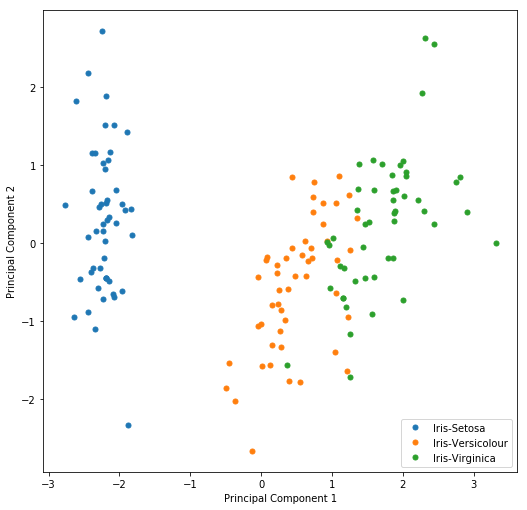

In [12]:
# Generate grouped data first
grouped = pca2_df.groupby('Class')

# Then draw the plot by group
fig, ax = plt.subplots(figsize=(8.5,8.5))
for name, group in grouped:
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=5, label=name)
ax.legend(['Iris-Setosa','Iris-Versicolour','Iris-Virginica'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('HW7_2D_plot.png', dpi=100,bbox_inches='tight')
plt.show()